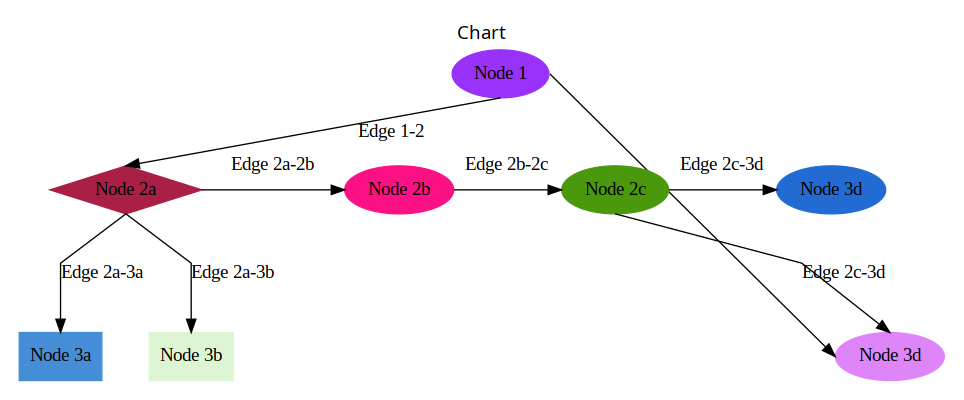

In [1]:
import random
import pydot
from pydot_flow import Chart
from IPython.display import Image


def random_color():
    "Generate a random color."
    return "#" + hex(random.randint(0, 0xFFFFFF))[2:].rjust(6, "0")


chart = Chart(
    rankdir="TB",
    splines="false",
    label="Chart",
    labelloc="t",
    fontname="Sans",
    pad=0.2,
)

chart.get_graph().set_node_defaults(style="filled")

node_1 = chart.create_node(
    src_node_attrs={"label": "Node 1", "color": random_color(), "style": "filled"}
)

node_2a = node_1.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 2a",
        "shape": "diamond",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 1-2"},
)

node_2b = node_2a.flow(
    src_port="e",
    dst_node_attrs={
        "label": "Node 2b",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2a-2b", "minlen": 3},
    graph=pydot.Subgraph(rank="same"),
)

node_2c = node_2b.flow(
    src_port="e",
    dst_node_attrs={
        "label": "Node 2c",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2b-2c", "minlen": 2},
)

node_3d = node_2c.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3d",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2c-3d", "minlen": 2},
    graph=chart.get_graph(),
)

node_2c.flow(
    src_port="e",
    dst_node_attrs={
        "label": "Node 3d",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2c-3d", "minlen": 2},
)

node_3a = node_2a.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3a",
        "shape": "box",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2a-3a", "minlen": 2, "labeldistance": 2},
)


node_3b = node_2a.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3b",
        "shape": "box",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2a-3b", "minlen": 2},
)

node_1.flow(src_port="e", dst_node_attrs={"name": node_3d.get_name()})

Image(chart.get_graph().create_png())

In [ ]:
import pydot
import uuid
from IPython.display import Image, display

graph = pydot.Dot(rankdir="TB", splines="false")

node_1 = pydot.Node(str(uuid.uuid4()), fillcolor="blue")

node_2 = pydot.Node(str(uuid.uuid4()), color="red", style="filled")

subgraph = pydot.Subgraph(rank="same")
subgraph.add_node(node_1)
subgraph.add_node(node_2)
edge = pydot.Edge(
    src=node_2.get_name() + ":e",
    dst=node_1.get_name() + ":w",
    dir="back",
    label="Label",
)
subgraph.add_edge(edge)
graph.add_subgraph(subgraph)

Image(graph.create_png())

graph.get_subgraph_list()

node = pydot.Node(fillcolor="blue")

edge = pydot.Edge()

